# Step-1 Importing Libaries

In [ ]:
Panda is used for data manipulation and anlaysis.
numpy is used for numerical operations.
matplotlib and seaborn are used for data visualizations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step-2 Create the data Frame

In [3]:
dataframe=pd.read_csv("Zomato data .csv")

In [4]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# Convert the data type of column- rate

In [5]:
def handlerate(value):
    value=str(value).split("/")
    value=value[0]
    return float(value)
dataframe["rate"]=dataframe["rate"].apply(handlerate)
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [8]:
#showing null value.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Type of Resturant

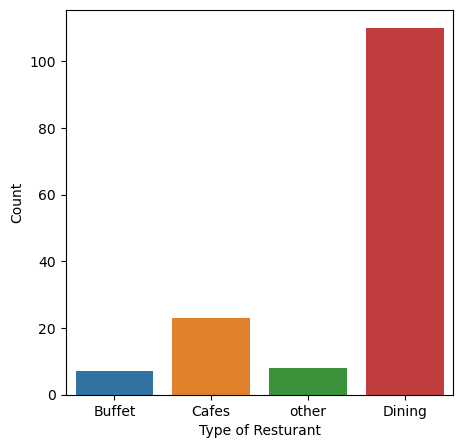

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(x=dataframe["listed_in(type)"])
plt.xlabel("Type of Resturant")
plt.ylabel("Count")
plt.show()

# conculsion- majority of the resturant falls in dinning category

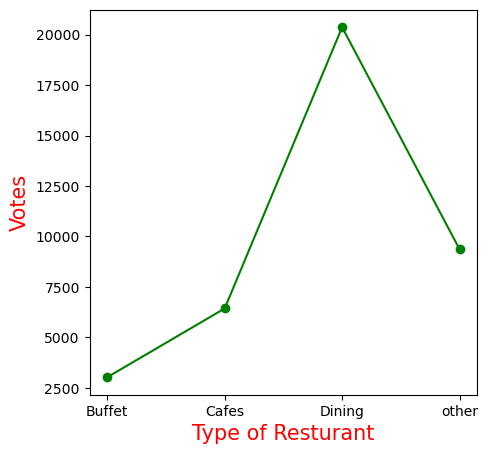

In [17]:
plt.figure(figsize=(5,5))
grouped_data=dataframe.groupby("listed_in(type)")["votes"].sum()
result=pd.DataFrame({'vote':grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("Type of Resturant",c="red",size=15)
plt.ylabel("Votes",c="red",size=15)
plt.show()

# conclusion- the dining reasturant has recived maximum vote

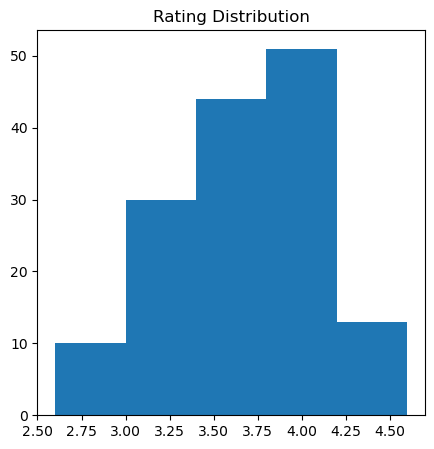

In [19]:
plt.figure(figsize=(5,5))
plt.hist(dataframe["rate"],bins=5)
plt.title("Rating Distribution")
plt.show()

# conclusion- The majority resturant received rating from 3.5 to 4 

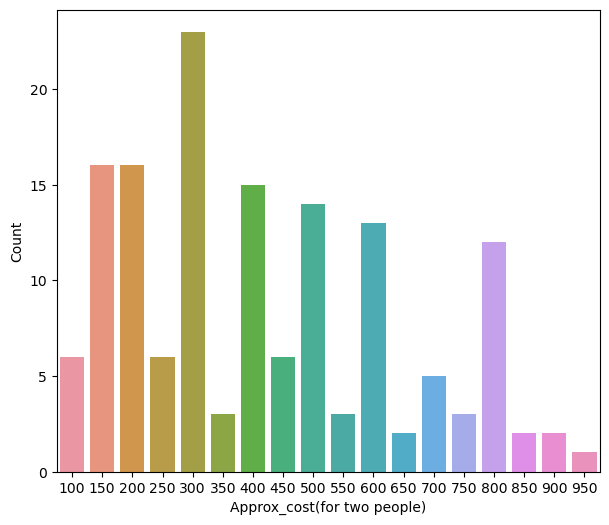

In [25]:
plt.figure(figsize=(7,6))
couple_data=dataframe["approx_cost(for two people)"]
sns.countplot(x=couple_data)
plt.xlabel("Approx_cost(for two people)")
plt.ylabel("Count")
plt.show()

# conclusion-The majority of couple prefer resturant witn an approx cost 300 rupees

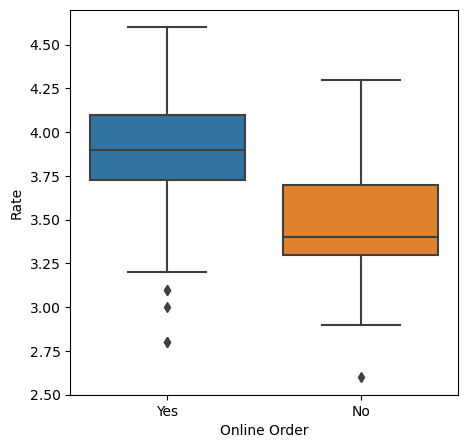

In [30]:
plt.figure(figsize=(5,5))
sns.boxplot(x="online_order",y="rate",data=dataframe)
plt.xlabel("Online Order")
plt.ylabel("Rate")
plt.show()

# conclusion- Offline orders recieve lower rating in comparison to online order

In [6]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


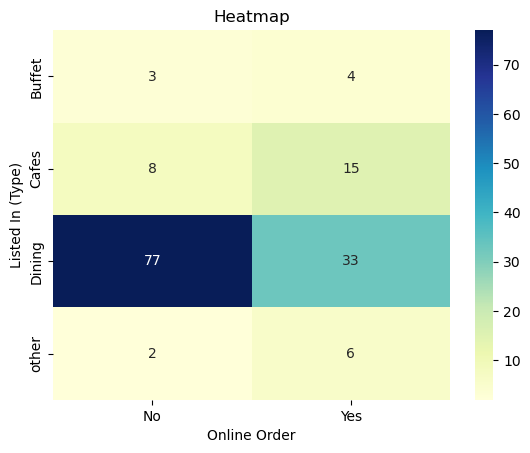

In [9]:
pivot_table=dataframe.pivot_table(index="listed_in(type)",columns="online_order",aggfunc="size",fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt="d")
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

# conclusion- Dinning resturant primarily accept offline orders, whereas cafes primarily receive online orders. This suggest the client prefrence order in person at resturant,but prefer online ordering at cafes.